## Calculo

In [160]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy as scp
import scipy.integrate as integrate

In [161]:
energy_exit=1.67                                # MeV
energy_into=np.array([5.737,5.486,5.275])       # MeV
rho_Ar = 1.65*10**(-3)                          # g/cm³
rho_Al = 2.7                                    # g/cm³
rho_C  = 1.7                                    # g/cm³


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_88256/1969441859.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("Alpha_Al.txt",sep='\s+')


CSDA para 5.737e+00 es 2.473e-03 [cm]
CSDA para 5.486e+00 es 2.157e-03 [cm]
CSDA para 5.275e+00 es 2.157e-03 [cm]
[0.02088949 0.01763091 0.01763091] en cm


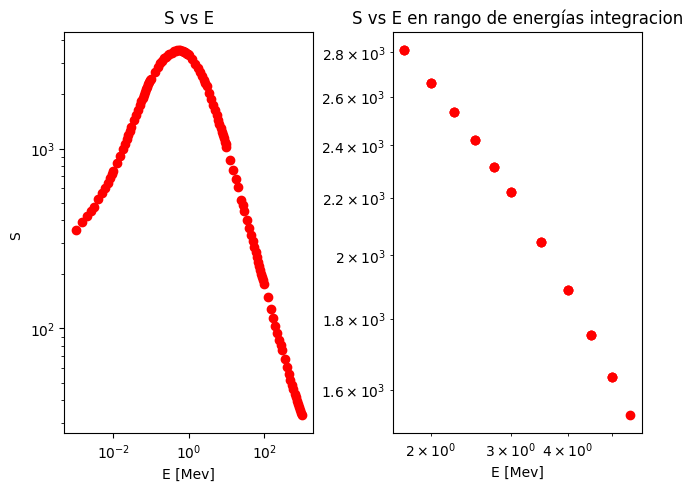

In [ ]:
df = pd.read_csv("Alpha_Al.txt",sep='\s+')
rho = rho_Al
rango_interes = np.zeros_like(energy_into)      # cm


# cremoa arrays
stopping=rho*df['TotalStoppingPower'].to_numpy()
energy=df["KineticEnergy"].to_numpy()
rango_CSDA=(1/rho)*df["RangeCSDA"].to_numpy()


# Ajustamos para luego integrar

# Grafico
fig,ax = plt.subplots(1,2)
fig.set_constrained_layout("constrained") 
ax[0].scatter(energy,stopping,color="red")
ax[0].set_xlabel("E [Mev]")
ax[0].set_ylabel("S ")
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_title("S vs E")


for i in range(len(energy_into)):
    for j in range(len(energy)):
        if (energy_into[i]>energy[j] and energy[j]>energy_exit and j>0):
            #print(energy[j+1]-energy[j-1])
            DE = (energy[j+1]-energy[j-1])/ 2
            rango_interes[i]+=DE/stopping[j]
            ax[1].scatter(energy[j],stopping[j],color="red")
            
            if not(energy_into[i]>energy[j+1] and energy[j+1]>energy_exit):
                print(f"CSDA para {energy_into[i]:.3e} es {rango_CSDA[j]:.3e} [cm]")
            
ax[1].set_xlabel("E [Mev]")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_title("S vs E en rango de energías integracion")

            
            
print(rango_interes*10,"en mm")